# <center>Lectura de datos y análisis descriptivo<center>

### Predicción del recuento de alquiler de bicicletas por día en función de la configuración ambiental y estacional.

Debido a problemas con los certificados en Mac, deben añadirse las dos líneas siguientes para importar correctamente ficheros de forma segura.

In [20]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
 

In [21]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [22]:
url = "https://raw.githubusercontent.com/JaimeOro/AnalisisDatos/main/day.csv"

Asignamos el dataset en un objeto, es similar a un diccionario contiene keys y values:

In [23]:
dataset = read_csv(url)

In [24]:
print(dataset.shape)

(731, 16)


Encontramos 731 Instancias y 16 Atributos

### Descripción de los atributos 

Todos los atributos, salvo la fecha se han reducido o normalizado

#### Atributos de Entrada:

- instant: identificador índice único de la tabla $( Cuantitativo $ $ continuo )$
- dteday : Fecha $( Fecha/texto )$
- season : Estación  $( Cuantitativo $ $ discreto )$
    - 1: invierno 
    - 2: primavera 
    - 3: verano 
    - 4: otoño
- yr : Año $( Cuantitativo $ $ discreto )$
    - 0: 2011
    - 1: 2012
- mnth : Mes (1 to 12) $( Cuantitativo $ $ discreto )$
- hr : Hora (0 to 23) $( Cuantitativo $ $ discreto )$
- holiday :  $( Binario/Booleano )$
    - 1: día de vacaciones
    - 0: no 
- weekday : Día de la semana (1 a 7)  $( Cuantitativo $ $ discreto )$
- workingday :  $( Binario/Booleano )$
    - 1: laborable
    - 0: festivo o fin de semana
+ weathersit : $( Cuantitativo $ $ discreto )$
    - 1: Despejado, Pocas nubes, Parcialmente nublado, Parcialmente nublado
    - 2: Niebla + Nublado, Niebla + Nubes rotas, Niebla + Pocas nubes, Niebla
    - 3: Nieve ligera, Lluvia ligera + Tormenta + Nubes dispersas, Lluvia ligera + Nubes dispersas
    - 4: Lluvia intensa + Paletas de hielo + Tormenta + Niebla, Nieve + Niebla
- temp : Temperatura normalizada (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (solo escala horaria) $( Cuantitativo $ $ continuo )$
- atemp: sensación térmica normalizada grados Celsius, (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 $( Cuantitativo $ $ continuo )$
- hum: Humedad normalizada. Los valores se dividen entre cien 100 (max) $( Cuantitativo $ $ continuo )$
- windspeed: Velocidad del viento normalizada. Los valores se dividen entre 67 (max) $( Cuantitativo $ $ continuo )$
- casual: Recuento de usuarios ocasionales $( Cuantitativo $ $ continuo )$
- registered: Recuento de usuarios registrados $( Cuantitativo $ $ continuo )$

#### Clase de Salida: $( Cuantitativo $ $ continuo )$
- cnt: recuento del total de bicicletas alquiladas, incluidas las informales y las registradas

Se muestran unos datos para ver cómo son:

In [25]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Distribución por clases:

In [26]:
print("Instancias por estación: ")
print(dataset.groupby('season').size())

Instancias por estación: 
season
1    181
2    184
3    188
4    178
dtype: int64


Se puede jugar para analizar cuantas horas se han alquilado en base a la estación del año:
    
- 1:invierno 
- 2:primavera
- 3:verano
- 4:otoño




In [27]:
print("Horas de alquiler por mes")
print(dataset.groupby("mnth")["cnt"].sum())

Horas de alquiler por mes
mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


O quizá por si el día está despejado o llueve.. por el tiempo que hace 

- 1: Despejado, Pocas nubes, Parcialmente nublado, Parcialmente nublado
- 2: Niebla + Nublado, Niebla + Nubes rotas, Niebla + Pocas nubes, Niebla
- 3: Nieve ligera, Lluvia ligera + Tormenta + Nubes dispersas, Lluvia ligera + Nubes dispersas
- 4: Lluvia intensa + Paletas de hielo + Tormenta + Niebla, Nieve + Niebla

In [28]:
print("Horas de alquiler por tiempo atmosférico")
print(dataset.groupby("weathersit")["cnt"].sum())

Horas de alquiler por tiempo atmosférico
weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64


Cuando la lluvia es intensa no hay datos, no se alquilan bicicletas

Dibujemos ahora histogramas:

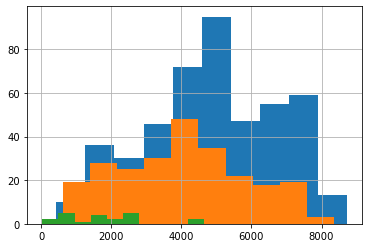

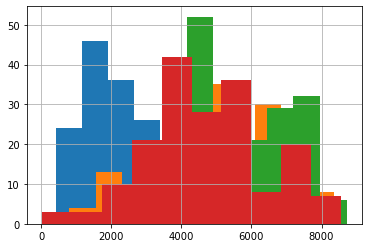

In [29]:
dataset.groupby("weathersit")["cnt"].hist()
pyplot.show()

dataset.groupby("season")["cnt"].hist()
pyplot.show()

### Comentarios:

Son datos bien tratados, los valores cuantitativos han sido reducidos a cualitativos de modo que se hace sencillo su estudio y tratamiento.<br><br>
Hay multiples variables interesantes de analizar para predecir el futuro infiriendo la capacidad (numero de bicicletas disponibles, etc.) que se debe tener disponible según sea el tiempo atmosférico, la temperatura, día de la semana, etc... <br><br>

Gracias por leer mi trabajo

$\ \ Jaime\ César\ Orozco\ Lombart $